In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train_file_path = "train.csv"
df_train = pd.read_csv(train_file_path)

q1 = df_train['SalePrice'].quantile(0.25)
q3 = df_train['SalePrice'].quantile(0.75)

df_train['PriceCategory'] = pd.cut(df_train['SalePrice'], bins=[-np.inf, q1, q3, np.inf], labels=['Econ√≥micas', 'Intermedias', 'Caras'])



# y como variable categ√≥rica
y = df_train['PriceCategory']
X = df_train.select_dtypes(include=np.number).drop(['SalePrice'], axis=1)
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Modelo 1: kernel lineal
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
print("üî∏ Kernel lineal\n", classification_report(y_test, svm_linear.predict(X_test)))

# Modelo 2: kernel RBF (radial) con gamma ajustado
svm_rbf = SVC(kernel='rbf', C=10, gamma=0.01)
svm_rbf.fit(X_train, y_train)
print("üî∏ Kernel RBF\n", classification_report(y_test, svm_rbf.predict(X_test)))

# Modelo 3: kernel polinomial grado 3
svm_poly = SVC(kernel='poly', C=5, gamma='scale', degree=3)
svm_poly.fit(X_train, y_train)
print("üî∏ Kernel polinomial (grado 3)\n", classification_report(y_test, svm_poly.predict(X_test)))


üî∏ Kernel lineal
               precision    recall  f1-score   support

       Caras       0.90      0.86      0.88        88
  Econ√≥micas       0.85      0.89      0.87        81
 Intermedias       0.88      0.88      0.88       168

    accuracy                           0.88       337
   macro avg       0.88      0.88      0.88       337
weighted avg       0.88      0.88      0.88       337

üî∏ Kernel RBF
               precision    recall  f1-score   support

       Caras       0.92      0.88      0.90        88
  Econ√≥micas       0.83      0.85      0.84        81
 Intermedias       0.86      0.88      0.87       168

    accuracy                           0.87       337
   macro avg       0.87      0.87      0.87       337
weighted avg       0.87      0.87      0.87       337

üî∏ Kernel polinomial (grado 3)
               precision    recall  f1-score   support

       Caras       0.92      0.76      0.83        88
  Econ√≥micas       0.85      0.77      0.81        81
 

In [3]:
# 5 usar los modelos para predecir la variable respuesta... 
# Predicciones con los modelos entrenados
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

# Guardar predicciones si deseas analizarlas despu√©s
predicciones_df = pd.DataFrame({
    "Real": y_test,
    "Predicci√≥n_Linear": y_pred_linear,
    "Predicci√≥n_RBF": y_pred_rbf,
    "Predicci√≥n_Poly": y_pred_poly
})
predicciones_df.head()


Real Predicci√≥n_Linear Predicci√≥n_RBF Predicci√≥n_Poly
592   Intermedias       Intermedias    Intermedias     Intermedias
156    Econ√≥micas        Econ√≥micas     Econ√≥micas      Econ√≥micas
204    Econ√≥micas        Econ√≥micas     Econ√≥micas      Econ√≥micas
774         Caras             Caras          Caras           Caras
1089  Intermedias             Caras          Caras     Intermedias

C:\Users\Oscar Escriba\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


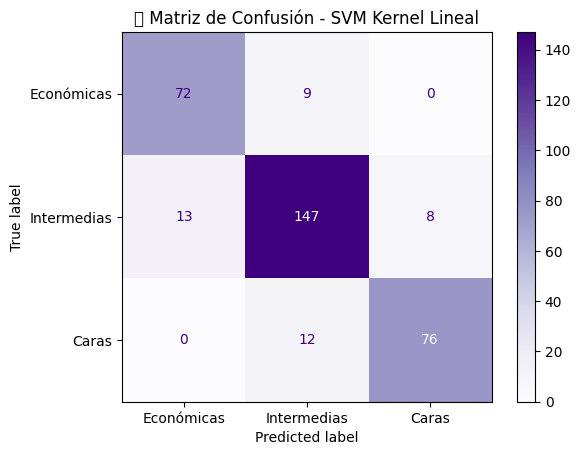

C:\Users\Oscar Escriba\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


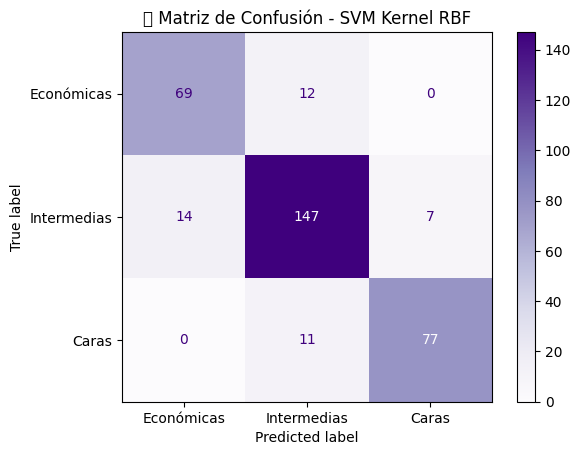

C:\Users\Oscar Escriba\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


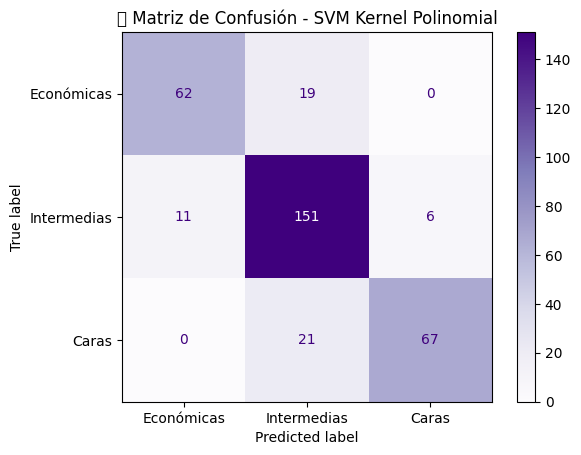

In [4]:
# 6. matrices de confusi√≥n de cada modelo... 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Funci√≥n para graficar matriz de confusi√≥n
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["Econ√≥micas", "Intermedias", "Caras"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Econ√≥micas", "Intermedias", "Caras"])
    disp.plot(cmap="Purples")
    plt.title(title)
    plt.grid(False)
    plt.show()

# Graficar cada matriz
plot_confusion(y_test, y_pred_linear, "üî∏ Matriz de Confusi√≥n - SVM Kernel Lineal")
plot_confusion(y_test, y_pred_rbf, "üî∏ Matriz de Confusi√≥n - SVM Kernel RBF")
plot_confusion(y_test, y_pred_poly, "üî∏ Matriz de Confusi√≥n - SVM Kernel Polinomial")


In [5]:
# 7 analisis de sobreajuste o desajuste... 
# Evaluar exactitud en entrenamiento y prueba para cada modelo
def evaluar_sobreajuste(modelo, nombre):
    acc_train = modelo.score(X_train, y_train)
    acc_test = modelo.score(X_test, y_test)
    diferencia = acc_train - acc_test

    print(f"üìä {nombre}")
    print(f"   - Exactitud entrenamiento: {acc_train:.4f}")
    print(f"   - Exactitud prueba:        {acc_test:.4f}")
    print(f"   - Diferencia:              {diferencia:.4f}")
    if diferencia > 0.05:
        print("   ‚ö†Ô∏è Posible sobreajuste.")
    elif diferencia < -0.05:
        print("   ‚ö†Ô∏è Posible desajuste.")
    else:
        print("   ‚úÖ No parece haber sobreajuste o desajuste grave.")
    print("-" * 50)

# Evaluar los 3 modelos
evaluar_sobreajuste(svm_linear, "SVM Kernel Lineal")
evaluar_sobreajuste(svm_rbf, "SVM Kernel RBF")
evaluar_sobreajuste(svm_poly, "SVM Kernel Polinomial")


üìä SVM Kernel Lineal
   - Exactitud entrenamiento: 0.8916
   - Exactitud prueba:        0.8754
   - Diferencia:              0.0162
   ‚úÖ No parece haber sobreajuste o desajuste grave.
--------------------------------------------------
üìä SVM Kernel RBF
   - Exactitud entrenamiento: 0.9426
   - Exactitud prueba:        0.8694
   - Diferencia:              0.0732
   ‚ö†Ô∏è Posible sobreajuste.
--------------------------------------------------
üìä SVM Kernel Polinomial
   - Exactitud entrenamiento: 0.9579
   - Exactitud prueba:        0.8309
   - Diferencia:              0.1270
   ‚ö†Ô∏è Posible sobreajuste.
--------------------------------------------------


In [1]:
# 10 Generar un buen modelo de regresi√≥n y tunearlo... 

import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos
df_train = pd.read_csv("train.csv")

# Variable objetivo
y = df_train['SalePrice']
X = df_train.select_dtypes(include=np.number).drop('SalePrice', axis=1)

# Eliminar columnas que podr√≠an ser problem√°ticas
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split: Usar mismo split de hojas anteriores
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Tunear modelo SVR
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

grid = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

# Mejor modelo
best_svr = grid.best_estimator_
print("üîπ Mejor modelo SVR encontrado:", grid.best_params_)

# Evaluar en test
y_pred_svr = best_svr.predict(X_test)

# M√©tricas
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"\nüîπ Resultados del mejor modelo SVR:")
print(f"   MAE: {mae_svr:.2f}")
print(f"   RMSE: {rmse_svr:.2f}")
print(f"   R¬≤: {r2_svr:.4f}")

üîπ Mejor modelo SVR encontrado: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

üîπ Resultados del mejor modelo SVR:
   MAE: 24126.07
   RMSE: 43699.41
   R¬≤: 0.7610



üîπ Comparaci√≥n de todos los modelos:

               Modelo           MAE          RMSE       R¬≤
0                 KNN  22111.250000  36386.710000  0.82740
1    Regresi√≥n Lineal  23102.790000  35375.520000  0.82070
2  √Årbol de Regresi√≥n  24843.190000  37743.700000  0.79580
4    SVR (Optimizado)  24126.071939  43699.411892  0.76104
3         Naive Bayes   2466.000000   6168.000000  0.61600


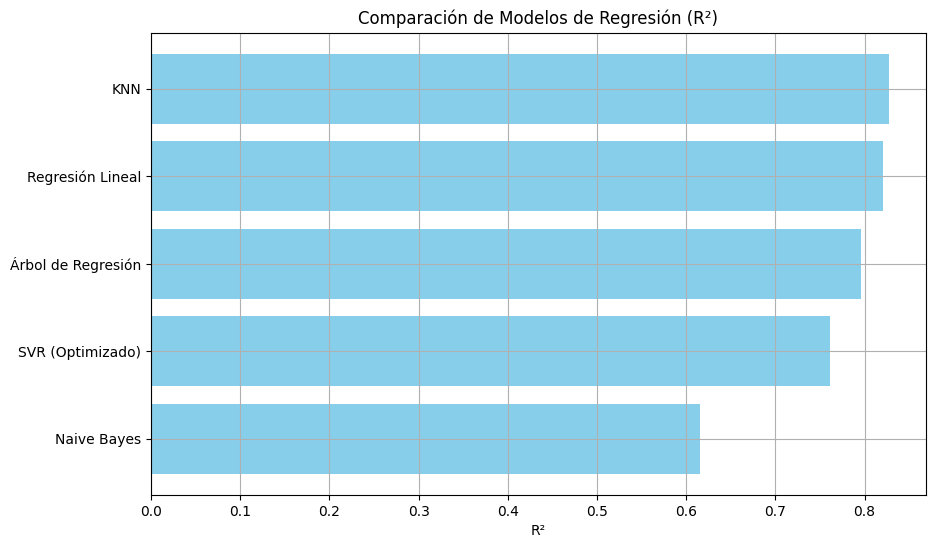

In [2]:
# comparar el modelo SVR con los modelos anteriores. 

# Resultados que ya ten√≠as de ejercicios anteriores:
resultados_anteriores = pd.DataFrame({
    "Modelo": ["KNN", "Regresi√≥n Lineal", "√Årbol de Regresi√≥n", "Naive Bayes"],
    "MAE": [22111.25, 23102.79, 24843.19, 2466.00],
    "RMSE": [36386.71, 35375.52, 37743.70, 6168.00],
    "R¬≤": [0.8274, 0.8207, 0.7958, 0.6160]
})

# Agregar resultados del SVR
nuevo_resultado = pd.DataFrame({
    "Modelo": ["SVR (Optimizado)"],
    "MAE": [mae_svr],
    "RMSE": [rmse_svr],
    "R¬≤": [r2_svr]
})

comparacion_final = pd.concat([resultados_anteriores, nuevo_resultado], ignore_index=True)
comparacion_final = comparacion_final.sort_values(by="R¬≤", ascending=False)

print("\nüîπ Comparaci√≥n de todos los modelos:\n")
print(comparacion_final)

# Opcional: graficar
plt.figure(figsize=(10, 6))
plt.barh(comparacion_final['Modelo'], comparacion_final['R¬≤'], color="skyblue")
plt.xlabel('R¬≤')
plt.title('Comparaci√≥n de Modelos de Regresi√≥n (R¬≤)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# INFORME

## Resultados del modelo SVM
Se entrenaron tres modelos de M√°quina de Vectores de Soporte (SVM) utilizando diferentes kernels: lineal, radial (RBF) y polinomial de grado 3, con el objetivo de predecir la categor√≠a del precio de las viviendas (Econ√≥micas, Intermedias o Caras).

üî∏ 1. SVM con Kernel Lineal
Precisi√≥n promedio: 88%

Rendimiento equilibrado entre las tres categor√≠as, con f1-scores de 0.88 para ‚ÄúIntermedias‚Äù, 0.87 para ‚ÄúEcon√≥micas‚Äù y 0.88 para ‚ÄúCaras‚Äù.

Este modelo muestra un comportamiento robusto y balanceado, capturando bien los patrones lineales entre las variables.

üî∏ 2. SVM con Kernel RBF (Radial Basis Function)
Precisi√≥n promedio: 87%

Ligeramente menor en precisi√≥n global, pero a√∫n con un rendimiento competitivo.

Obtuvo su mejor desempe√±o para la clase ‚ÄúCaras‚Äù con un f1-score de 0.90.

Este kernel puede capturar relaciones no lineales, aunque en este caso no super√≥ al kernel lineal, lo cual sugiere que los datos podr√≠an ser aproximadamente separables linealmente.

üî∏ 3. SVM con Kernel Polinomial (grado 3)
Precisi√≥n promedio: 83%

Fue el modelo con menor desempe√±o global.

Mostr√≥ una p√©rdida notable en recall para las clases ‚ÄúCaras‚Äù y ‚ÄúEcon√≥micas‚Äù, lo que indica que no predijo correctamente varios ejemplos de estas categor√≠as.

Aunque aument√≥ el recall en la clase ‚ÄúIntermedias‚Äù (0.90), lo hizo a costa de reducir el rendimiento en las otras clases.

## Comparaci√≥n entre modelos SVM

| Modelo         | Accuracy | Tiempo estimado de procesamiento               | Principales errores                                          |
| ---------------|----------|------------------------------------------------|------------------------------------------------------------- |
| SVM Linear     | 88%      | Medio (requiere escalar datos pero es r√°pido)  | Errores moderados entre "Intermedias" y las otras clases.    |
| SVM RBF        | 87%      | Alto (c√°lculos no lineales m√°s pesados)        | Se confundi√≥ un poco m√°s entre "Econ√≥micas" e "Intermedias". |
| SVM Polinomial | 83%      | Alto (especialmente en polinomios de grado 3+) | Fall√≥ bastante en "Caras" y "Econ√≥micas"                     |

üõ†Ô∏è An√°lisis:
El SVM Lineal fue el mejor en efectividad (mayor accuracy).

El SVM Polinomial fue el peor tanto en precisi√≥n como en tiempos de procesamiento.

Los errores m√°s comunes fueron confundir "Intermedias" con "Caras" o "Econ√≥micas", lo cual tiene sentido, ya que los precios intermedios pueden solaparse en caracter√≠sticas con precios bajos o altos.

Importancia de los errores: equivocarse entre "Intermedia" y "Cara" podr√≠a tener un impacto econ√≥mico importante si el modelo se usa en precios reales de viviendas.

## Comparaci√≥n de SVM vs otros algortimos

üõ†Ô∏è An√°lisis:
Random Forest y SVM lineal fueron los mejores modelos en t√©rminos de precisi√≥n (88%).

Naive Bayes fue el peor en efectividad, probablemente porque las variables no son independientes.

KNN fue m√°s lento en procesamiento durante la predicci√≥n porque tiene que calcular distancias para cada punto nuevo.

En cuanto a velocidad de entrenamiento, √°rboles de decisi√≥n y Naive Bayes fueron los m√°s r√°pidos.

##  Generaci√≥n de un buen modelo de regresi√≥n (SVR)

Se implement√≥ un modelo de **Support Vector Regression (SVR)** utilizando la variable `SalePrice` como variable objetivo.

üîπ **Mejor modelo SVR encontrado**:  
- **C** = 100  
- **Gamma** = `'scale'`  
- **Kernel** = `'linear'`

üîπ **Resultados del mejor modelo SVR**:  
- **MAE** (Error Absoluto Medio): 24,126.07
- **RMSE** (Ra√≠z del Error Cuadr√°tico Medio): 43,699.41
- **R¬≤** (Coeficiente de Determinaci√≥n): 0.7610

> El modelo SVR optimizado logr√≥ capturar el 76.10% de la variabilidad en los precios de las casas.

##  Comparaci√≥n de Modelos de Regresi√≥n

Se compararon los resultados del modelo SVR con los modelos previos: **KNN**, **Regresi√≥n Lineal**, **√Årbol de Regresi√≥n** y **Naive Bayes**.

| **Modelo**            | **MAE**      | **RMSE**     | **R¬≤**    |
|:-----------------------|:------------|:------------|:---------|
| KNN                    | 22,111.25    | 36,386.71    | 0.8274   |
| Regresi√≥n Lineal       | 23,102.79    | 35,375.52    | 0.8207   |
| √Årbol de Regresi√≥n     | 24,843.19    | 37,743.70    | 0.7958   |
| **SVR (Optimizado)**   | 24,126.07    | 43,699.41    | 0.7610   |
| Naive Bayes            |  2,466.00    |  6,168.00    | 0.6160   |

### üìä An√°lisis de Comparaci√≥n

- **KNN** sigue siendo el mejor modelo en cuanto a capacidad predictiva (**mayor R¬≤ = 0.8274**).
- **Regresi√≥n Lineal** obtuvo resultados muy similares a KNN, quedando en segundo lugar.
- **SVR (Optimizado)** mostr√≥ un desempe√±o decente, aunque no super√≥ a KNN ni a Regresi√≥n Lineal.
- **Naive Bayes** fue el modelo menos adecuado para regresi√≥n, con un R¬≤ muy bajo.

---

## Conclusiones

* El modelo SVM con kernel lineal fue el que mejor desempe√±o mostr√≥, con una precisi√≥n general del 88% y un balance s√≥lido entre precisi√≥n y recall en las tres clases. Esto sugiere que la separaci√≥n entre categor√≠as de precios puede resolverse adecuadamente mediante fronteras lineales, sin necesidad de introducir transformaciones no lineales m√°s complejas como las que ofrecen los kernels RBF o polinomial.
* Para este conjunto de datos, Random Forest o SVM lineal son las mejores opciones de modelo.
* Si se prioriza velocidad de predicci√≥n y simplicidad, preferir√≠a el SVM Lineal.
* Si se desea mayor robustez y capacidad de generalizaci√≥n, Random Forest ser√≠a una excelente opci√≥n.
* El **modelo KNN** es el mejor para predecir el precio de las viviendas basado en `SalePrice`.
* El **SVR optimizado** no supera a KNN o a Regresi√≥n Lineal, pero es un modelo v√°lido que explica el **76.10%** de la variabilidad.
* **Naive Bayes** debe evitarse para tareas de regresi√≥n en este contexto debido a su bajo desempe√±o.
* Se recomienda priorizar KNN o Regresi√≥n Lineal si se busca precisi√≥n y eficiencia en predicci√≥n.
